In [1]:
import numpy as np
import pandas as pd



In [2]:
df=pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [3]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
72,house,shivpuri,sector 7,2.40,8889.0,2700.0,Plot area 300(250.84 sq.m.),10.0,5.0,3,"pooja room,study room,servant room",2.0,North,10+ Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Arya...","['4 Wardrobe', '9 Fan', '4 Light', 'No AC', 'N...",['Fitness Centre / GYM']
1628,flat,dlf the arbour,sector 63,7.90,20000.0,3950.0,Built Up area: 3950 (366.97 sq.m.)Carpet area:...,4.0,4.0,3+,not available,34.0,NaN,Jan 2028,"['Radhakrishna Shani Mandir', 'pracksht hospit...",[],NaN
711,house,independent,sector 43,5.50,28424.0,1935.0,Plot area 215(179.77 sq.m.),1.0,1.0,0,others,1.0,South-West,10+ Year Old,"['Huda city centre metro station', 'Sector 42-...","['1 Light', 'No AC', 'No Bed', 'No Chimney', '...","['Feng Shui / Vaastu Compliant', 'Visitor Park..."
951,flat,orris aster court,sector 85,0.67,5825.0,1150.0,Super Built up area 1375(127.74 sq.m.)Built Up...,2.0,2.0,2,others,5.0,North-West,1 to 5 Year Old,"['Proposed Metro Station', 'Dwarka Expressway'...","['4 Fan', '1 Exhaust Fan', '1 Geyser', '15 Lig...","['Centrally Air Conditioned', 'Water purifier'..."
1295,flat,the khushboo cooperative housing society ltd,sector 9a,0.88,4888.0,1800.0,Super Built up area 1800(167.23 sq.m.)Carpet a...,3.0,3.0,2,not available,2.0,North-West,10+ Year Old,"['Sector 42-43 metro station', 'Huda city cent...","['4 Wardrobe', '6 Fan', '1 Exhaust Fan', '4 Ge...","['Security / Fire Alarm', 'Lift(s)', 'Water St..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3850 entries, 0 to 3849
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3850 non-null   object 
 1   society          3849 non-null   object 
 2   sector           3850 non-null   object 
 3   price            3785 non-null   float64
 4   price_per_sqft   3823 non-null   float64
 5   area             3785 non-null   float64
 6   areaWithType     3803 non-null   object 
 7   bedRoom          3803 non-null   float64
 8   bathroom         3803 non-null   float64
 9   balcony          3803 non-null   object 
 10  additionalRoom   3850 non-null   object 
 11  floorNum         3784 non-null   float64
 12  facing           2698 non-null   object 
 13  agePossession    3802 non-null   object 
 14  nearbyLocations  3665 non-null   object 
 15  furnishDetails   2822 non-null   object 
 16  features         3168 non-null   object 
dtypes: float64(6),

In [5]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                65
price_per_sqft       27
area                 65
areaWithType         47
bedRoom              47
bathroom             47
balcony              47
additionalRoom        0
floorNum             66
facing             1152
agePossession        48
nearbyLocations     185
furnishDetails     1028
features            682
dtype: int64

In [6]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
910,1.25,1383.0,Built Up area: 1383 (128.48 sq.m.)
948,0.87,940.0,Super Built up area 1385(128.67 sq.m.)Built Up...
3718,0.35,875000.0,Built Up area: 737147 (68483.2 sq.m.)
1492,1.42,1423.0,Carpet area: 1423 (132.2 sq.m.)
69,4.25,1350.0,Plot area 163(136.29 sq.m.)Built Up area: 161 ...


In [15]:
# This function extracts the Super Built up area
import re
def get_super_built_up_area(text):
    if isinstance(text, str):
        match = re.search(r'Super Built up area (\d+\.?\d*)', text)
        if match:
            return float(match.group(1))
    return None



In [22]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    if not isinstance(text, str):
        return None
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None


In [19]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None or not isinstance(text, str):
        return area_value  # Or None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # sq.m to sq.ft
    return area_value

In [20]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)


In [23]:
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

In [24]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area
1062,flat,assotech blith,sector 99,0.82,6007.0,1365.0,Built Up area: 1365 (126.81 sq.m.),2.0,2.0,3,not available,0.0,NaN,undefined,"['Shri Balaji Hospital and Trauma Center', 'Sh...","['1 Light', 'No AC', 'No Bed', 'No Chimney', '...",NaN,NaN,1365.0
162,flat,shree vardhman victoria,sector 70,1.23,9111.0,1350.0,Super Built up area 1350(125.42 sq.m.),2.0,2.0,3,study room,1.0,North-East,1 to 5 Year Old,"['Airia Mall', 'Golf Course Extn Road', 'Sohna...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...",1350.0,NaN
1575,flat,signature the serenas,sohna road,0.45,8474.0,531.0,Carpet area: 531 (49.33 sq.m.),2.0,2.0,1,not available,10.0,NaN,0 to 1 Year Old,"['Signature Global Infinity Mall', 'Sohna Road...",NaN,"['Security / Fire Alarm', 'Lift(s)', 'Maintena...",NaN,NaN
2819,flat,dlf new town heights,sector 90,1.65,6979.0,2364.0,Super Built up area 2364(219.62 sq.m.),4.0,4.0,3+,servant room,15.0,South-East,5 to 10 Year Old,"['Manish Gallexie 91', 'NH-8 IMT Manesar', 'RH...","['4 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Ge...","['Security / Fire Alarm', 'Power Back-up', 'In...",2364.0,NaN
859,flat,the arzoo cghs,sector 51,2.10,9130.0,2300.0,Built Up area: 2300 (213.68 sq.m.),4.0,4.0,3,not available,1.0,NaN,1 to 5 Year Old,"['Radhakrishna Shani Mandir', 'Sanatan Dharm M...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...",NaN,2300.0


In [25]:
# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [26]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
932,flat,godrej,sector 79,1.33,8531.0,1559.0,Super Built up area 1559(144.84 sq.m.),2.0,2.0,3,study room,6.0,North-West,1 to 5 Year Old,"['Vatika Town Square-INXT', 'Naurangpur Road',...",NaN,"['Centrally Air Conditioned', 'Security / Fire...",1559.0,NaN,NaN
2666,flat,baani city center,sector 63,0.88,10945.0,804.0,Built Up area: 804 (74.69 sq.m.)Carpet area: 6...,1.0,1.0,2,not available,4.0,NaN,undefined,"['Radhakrishna Shani Mandir', 'pracksht hospit...","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'N...",NaN,NaN,804.0,600.0
3057,flat,krisumi waterfall residences,sector 36a,2.30,15551.0,1479.0,Built Up area: 1479 (137.4 sq.m.),2.0,2.0,2,not available,23.0,NaN,undefined,"['Elan Miracle Mall', 'Dwarka Expy', 'NH 48', ...",NaN,NaN,NaN,1479.0,NaN
751,flat,ss the leaf,sector 85,1.10,9565.0,1150.0,Super Built up area 1640(152.36 sq.m.)Built Up...,2.0,2.0,3,pooja room,10.0,West,1 to 5 Year Old,"['Sapphire 83 Mall', 'Dwarka Expressway', 'Cen...",NaN,"['Water purifier', 'Security / Fire Alarm', 'F...",1640.0,1600.0,1150.0
2043,house,independent,sector 7,3.10,13778.0,2250.0,Plot area 250(209.03 sq.m.),3.0,3.0,2,not available,2.0,North-West,10+ Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Dr. ...","['6 Wardrobe', '30 Light', 'No AC', 'No Bed', ...","['Park', 'Visitor Parking', 'Low Density Socie...",NaN,NaN,NaN


In [27]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3678,2.40,house,900.0,Plot area 100(83.61 sq.m.),NaN,NaN,NaN
2595,0.22,flat,301.0,Carpet area: 301.28 (27.99 sq.m.),NaN,NaN,301.281561
3645,2.05,flat,2076.0,Carpet area: 2025 (188.13 sq.m.),NaN,NaN,2025.000000
1486,1.30,flat,1351.0,Super Built up area 1351(125.51 sq.m.),1351.0,NaN,NaN
141,0.87,flat,734.0,Super Built up area 1283(119.19 sq.m.)Built Up...,1283.0,978.23,734.430000


In [28]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape


(534, 7)

In [34]:
df[df['areaWithType'].str.contains('plot',case=False, na=False)][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2252,0.80,house,675.0,Plot area 75(62.71 sq.m.),NaN,NaN,NaN
1028,12.50,house,2430.0,Plot area 270(225.75 sq.m.),NaN,NaN,NaN
3678,2.40,house,900.0,Plot area 100(83.61 sq.m.),NaN,NaN,NaN
550,12.39,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN
1613,0.47,house,443.0,Plot area 49(40.97 sq.m.)Built Up area: 50 sq....,NaN,50.0,48.0


In [35]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]


In [36]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
11,4.95,house,2403.0,Plot area 267(223.25 sq.m.),NaN,NaN,NaN
13,NaN,house,NaN,NaN,NaN,NaN,NaN
14,0.60,house,540.0,Plot area 60(50.17 sq.m.),NaN,NaN,NaN
15,3.90,house,1836.0,Plot area 204(170.57 sq.m.),NaN,NaN,NaN
23,6.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,NaN,NaN


In [37]:
import re

def extract_plot_area(area_with_type):
    if isinstance(area_with_type, str):
        match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
        if match:
            return float(match.group(1))
    return None


In [38]:
df['plot_area'] = df['areaWithType'].apply(extract_plot_area)


In [43]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,plot_area
606,flat,ireo the grand arch,sector 58,3.83,21577.0,1775.0,Super Built up area 2164(201.04 sq.m.)Built Up...,3.0,4.0,2,...,10.0,North-East,1 to 5 Year Old,"['Sector 55-56 Rapid Metro', 'Paras Trinity Ma...","['4 Wardrobe', '10 Fan', '1 Exhaust Fan', '5 G...","['Centrally Air Conditioned', 'Water purifier'...",2164.0,2000.0,1775.0,NaN
417,flat,krisumi waterfall residences,sector 36a,3.65,14381.0,2538.0,Super Built up area 2538(235.79 sq.m.),3.0,3.0,2,...,17.0,East,Within 6 months,"['Sector 54 Chowk Metro Station', 'Vatika Town...","['5 AC', '1 Chimney', '1 Modular Kitchen', 'No...","['Security / Fire Alarm', 'Intercom Facility',...",2538.0,NaN,NaN,NaN
891,flat,ss the leaf,sector 85,1.18,10727.0,1100.0,Super Built up area 1741(161.74 sq.m.)Built Up...,2.0,2.0,3,...,9.0,North-East,1 to 5 Year Old,"['Sapphire 83 Mall', 'Dwarka Expressway', 'Cen...","['6 Fan', '1 Exhaust Fan', '3 Geyser', '8 Ligh...","['Water purifier', 'Security / Fire Alarm', 'F...",1741.0,1700.0,1100.0,NaN
2842,house,nul,sector 25,9.50,33404.0,2844.0,Plot area 316(264.22 sq.m.),9.0,9.0,3+,...,3.0,North-West,10+ Year Old,"['Vodafone belvedere towers metro station', 'D...",NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",NaN,NaN,NaN,316.0
3533,flat,shapoorji pallonji joyville gurugram,sector 102,2.04,14068.0,1450.0,Super Built up area 1852(172.06 sq.m.)Carpet a...,3.0,3.0,3+,...,1.0,South,1 to 5 Year Old,"['Khan Market', 'The Esplanade Mall', 'Dwarka ...","['2 Light', '1 Modular Kitchen', '1 Chimney', ...","['Feng Shui / Vaastu Compliant', 'Intercom Fac...",1852.0,NaN,1450.0,NaN


In [40]:

all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

In [41]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
11,4.95,house,2403.0,Plot area 267(223.25 sq.m.),NaN,267.0,NaN
13,NaN,house,NaN,NaN,NaN,NaN,NaN
14,0.60,house,540.0,Plot area 60(50.17 sq.m.),NaN,60.0,NaN
15,3.90,house,1836.0,Plot area 204(170.57 sq.m.),NaN,204.0,NaN
23,6.00,house,2700.0,Plot area 300(250.84 sq.m.),NaN,300.0,NaN


In [44]:
df.update(all_nan_df)

In [45]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,plot_area
2966,flat,emaar gurgaon greens,sector 102,1.55,9393.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet a...,3.0,4.0,3,...,7.0,North,1 to 5 Year Old,"['JMS Marine Square Mall', 'Dwarka Expressway'...","['5 Fan', '1 Exhaust Fan', '10 Light', '5 AC',...","['Centrally Air Conditioned', 'Security / Fire...",1650.0,NaN,1022.58,NaN
1096,flat,m3m soulitude,sector 89,1.32,16923.0,780.0,Carpet area: 780 (72.46 sq.m.),3.0,3.0,3,...,1.0,NaN,Dec 2023,"['Vatika Town Square-INXT', 'Sector 86 Road', ...",NaN,"['Power Back-up', 'Intercom Facility', 'Lift(s...",NaN,NaN,780.00,NaN
842,flat,ireo victory valley,sector 67,3.05,16266.0,1875.0,Super Built up area 2385(221.57 sq.m.)Built Up...,3.0,4.0,2,...,35.0,South-West,1 to 5 Year Old,"['AIPL Joy Street Mall', 'Golf Course Extensio...","['3 Wardrobe', '1 Water Purifier', '9 Fan', '1...","['Centrally Air Conditioned', 'Water purifier'...",2385.0,2200.0,1875.00,NaN
1076,house,independent,sector 6,0.50,8333.0,600.0,Plot area 600(55.74 sq.m.),3.0,3.0,2,...,2.0,East,5 to 10 Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...",[],NaN,NaN,600.0,NaN,600.0
2214,flat,signature global infinity mall,sector 36,0.41,6269.0,654.0,Built Up area: 654 (60.76 sq.m.),2.0,2.0,3,...,3.0,NaN,undefined,NaN,NaN,NaN,NaN,654.0,NaN,NaN


In [46]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    65
price_per_sqft           27
area                     65
areaWithType             47
bedRoom                  47
bathroom                 47
balcony                  47
additionalRoom            0
floorNum                 66
facing                 1152
agePossession            48
nearbyLocations         185
furnishDetails         1028
features                682
super_built_up_area    1935
built_up_area          2117
carpet_area            1906
plot_area              3168
dtype: int64

In [47]:
df.shape

(3850, 21)

In [48]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,plot_area
0,flat,experion windchants,sector 112,3.65,11428.0,3194.0,Built Up area: 2800 (260.13 sq.m.),3.0,5.0,2,...,3.0,South-West,1 to 5 Year Old,"['Ansal Plaza', 'Dwaraka Expressway', 'First S...","['5 Light', 'No AC', 'No Bed', 'No Chimney', '...","['Feng Shui / Vaastu Compliant', 'Intercom Fac...",NaN,2800.0,NaN,NaN
1,flat,vatika gurgaon,sector 83,1.25,7812.0,1600.0,Super Built up area 2390(222.04 sq.m.)Carpet a...,4.0,4.0,3,...,12.0,South-West,5 to 10 Year Old,"['Huda Metro Station (Gurugram)', 'Sapphire 83...","['4 Fan', '5 Light', '3 Wardrobe', 'No AC', 'N...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",2390.0,NaN,1600.0,NaN
2,flat,green court,sector 90,0.47,6811.0,690.0,Carpet area: 690 (64.1 sq.m.),2.0,2.0,1,...,0.0,East,0 to 1 Year Old,"['Baba Kanala Chowk', 'Pataudi Rd', 'Gurukul P...","['3 Fan', '1 Exhaust Fan', '7 Light', 'No AC',...","['Feng Shui / Vaastu Compliant', 'Security / F...",NaN,NaN,690.0,NaN
3,flat,orchid petals,sector 49,1.90,10526.0,1805.0,Super Built up area 1805(167.69 sq.m.)Built Up...,3.0,3.0,3,...,2.0,South,10+ Year Old,"['Sapphire Mall', 'Omaxe City Centre', 'BigBaz...","['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Ge...","['Feng Shui / Vaastu Compliant', 'Security / F...",1805.0,1600.0,1400.0,NaN
4,flat,bestech altura,sector 79,2.69,12500.0,2152.0,Super Built up area 2150(199.74 sq.m.),3.0,4.0,3+,...,3.0,NaN,0 to 1 Year Old,"['Sapphire 83 Mall', 'NH -8', 'Golf Course Ext...","['4 AC', 'No Bed', 'No Chimney', 'No Curtains'...","['Feng Shui / Vaastu Compliant', 'Security / F...",2150.0,NaN,NaN,NaN


In [49]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1634
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
                                                 ... 
servant room,study room,others                      1
servant room,pooja room,study room                  1
servant room,pooja room,store room,study room       1
store room,pooja room,servant room,study room       1
study room,others,servant room                      1
Name: count, Length: 65, dtype: int64

In [50]:
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']
for col in new_cols:
    df[col]=df['additionalRoom'].str.contains(col).astype(int)

In [51]:
df.sample(5)



,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,features,super_built_up_area,built_up_area,carpet_area,plot_area,study room,servant room,store room,pooja room,others
3078,flat,paras dews,sector 106,1.17,6647.0,1760.0,Super Built up area 1760(163.51 sq.m.)Built Up...,3.0,4.0,3+,...,"['Feng Shui / Vaastu Compliant', 'Security / F...",1760.0,1186.0,1130.0,NaN,0,1,0,0,0
1027,flat,bestech park view residency,sector 2,0.55,8461.0,650.0,Super Built up area 650(60.39 sq.m.),1.0,1.0,2,...,"['Lift(s)', 'Swimming Pool', 'Park', 'Visitor ...",650.0,NaN,NaN,NaN,0,0,0,0,0
1703,flat,bestech park view residency,sector 2,0.56,8632.0,649.0,Carpet area: 651 (60.48 sq.m.),1.0,2.0,2,...,"['Security / Fire Alarm', 'Lift(s)', 'Maintena...",NaN,NaN,651.0,NaN,0,0,0,0,0
2535,flat,satya element one,sector 49,0.94,14009.0,671.0,Carpet area: 671 (62.34 sq.m.),1.0,2.0,2,...,NaN,NaN,NaN,671.0,NaN,0,0,0,0,0
3512,house,independent,sector 57,6.21,23000.0,2700.0,Plot area 300(250.84 sq.m.),6.0,6.0,3+,...,"['Feng Shui / Vaastu Compliant', 'High Ceiling...",NaN,300.0,NaN,300.0,1,1,1,1,0


In [52]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,features,super_built_up_area,built_up_area,carpet_area,plot_area,study room,servant room,store room,pooja room,others
0,flat,experion windchants,sector 112,3.65,11428.0,3194.0,Built Up area: 2800 (260.13 sq.m.),3.0,5.0,2,...,"['Feng Shui / Vaastu Compliant', 'Intercom Fac...",NaN,2800.0,NaN,NaN,0,1,0,0,0
1,flat,vatika gurgaon,sector 83,1.25,7812.0,1600.0,Super Built up area 2390(222.04 sq.m.)Carpet a...,4.0,4.0,3,...,"['Security / Fire Alarm', 'Feng Shui / Vaastu ...",2390.0,NaN,1600.0,NaN,0,1,0,0,0
2,flat,green court,sector 90,0.47,6811.0,690.0,Carpet area: 690 (64.1 sq.m.),2.0,2.0,1,...,"['Feng Shui / Vaastu Compliant', 'Security / F...",NaN,NaN,690.0,NaN,0,0,0,0,0
3,flat,orchid petals,sector 49,1.90,10526.0,1805.0,Super Built up area 1805(167.69 sq.m.)Built Up...,3.0,3.0,3,...,"['Feng Shui / Vaastu Compliant', 'Security / F...",1805.0,1600.0,1400.0,NaN,0,0,0,0,1
4,flat,bestech altura,sector 79,2.69,12500.0,2152.0,Super Built up area 2150(199.74 sq.m.),3.0,4.0,3+,...,"['Feng Shui / Vaastu Compliant', 'Security / F...",2150.0,NaN,NaN,NaN,0,1,0,0,0


In [53]:
df.shape

(3850, 26)

In [54]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Jan 2024                 8
Oct 2024                 8
Jun 2024                 7
Dec 2025                 7
Aug 2023                 7
Nov 2023                 5
Jul 2024                 4
Aug 2024                 4
By 2025                  4
Sep 2023                 4
Oct 2023                 4
Nov 2024                 3
Jan 2025                 3
Feb 2024                 3
May 2024                 3
Aug 2025                 2
Dec 2026                 2
Jul 2025                 2
Apr 2026                 2
Mar 2025                 2
By 2027                  2
Sep 2025                 2
Jan 2026                 2
Oct 2025      

In [55]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [56]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [57]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,features,super_built_up_area,built_up_area,carpet_area,plot_area,study room,servant room,store room,pooja room,others
3372,house,dlf south city 1,sector 41,2.65,18928.0,1400.0,Plot area 2160(200.67 sq.m.)Built Up area: 180...,3.0,3.0,3,...,"['Private Garden / Terrace', 'Maintenance Staf...",NaN,1800.0,1400.0,2160.0,0,1,0,0,0
1954,flat,tulip ivory,sector 70,2.00,8333.0,2400.0,Super Built up area 2400(222.97 sq.m.),4.0,5.0,3+,...,"['Feng Shui / Vaastu Compliant', 'Security / F...",2400.0,NaN,NaN,NaN,0,1,0,0,0
748,flat,m3m skywalk,sector 74,1.54,11000.0,1400.0,Super Built up area 1400(130.06 sq.m.)Built Up...,2.0,2.0,3+,...,"['Centrally Air Conditioned', 'Security / Fire...",1400.0,1200.0,1100.0,NaN,0,0,0,0,1
2457,flat,pivotal devaan,sector 84,0.35,6003.0,583.0,Super Built up area 583(54.16 sq.m.),2.0,2.0,1,...,"['Security / Fire Alarm', 'Lift(s)', 'Maintena...",583.0,NaN,NaN,NaN,0,0,0,0,0
2333,house,unitech espace,sector 50,7.45,34491.0,2160.0,Plot area 240(200.67 sq.m.)Built Up area: 4500...,4.0,4.0,3,...,"['Private Garden / Terrace', 'Maintenance Staf...",NaN,4500.0,4000.0,240.0,0,1,0,0,0


In [58]:
df['agePossession'].isnull().sum()

np.int64(0)

In [59]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              380
Old Property           310
Under Construction     283
Name: count, dtype: int64

In [60]:
df.sample(5)[['furnishDetails']]

,furnishDetails
1753,NaN
2448,"['1 Water Purifier', '3 Fan', '1 Fridge', '1 E..."
2578,NaN
1833,NaN
2720,"['4 Wardrobe', '6 Fan', '1 Exhaust Fan', '2 Ge..."


In [61]:
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

In [62]:
unique_furnishings

['',
 '4 Light',
 '4 Chimney',
 '78 Light',
 '2 Wardrobe',
 '16 AC',
 '5 Fan',
 '11 Curtains',
 '10 Fan',
 '1 Washing Machine',
 '17 Fan',
 '7 TV',
 'No Bed',
 '11 Wardrobe',
 '33 Light',
 '11 Light',
 '23 Light',
 '27 Light',
 '7 Geyser',
 '60 Light',
 'No AC',
 '9 Fan',
 '14 AC',
 '22 Light',
 '2 Curtains',
 '42 Light',
 '12 Wardrobe',
 '3 Wardrobe',
 '1 Water Purifier',
 'No Modular Kitchen',
 '13 Light',
 '15 Curtains',
 '6 Fan',
 '1 Geyser',
 '1 Dining Table',
 '50 Light',
 '4 Curtains',
 '6 AC',
 '15 Fan',
 '1 Light',
 '100 Light',
 'No Microwave',
 '14 Wardrobe',
 '20 Curtains',
 '1 Fan',
 '55 Light',
 '1 Curtains',
 'No Stove',
 '8 Light',
 '9 AC',
 '10 Curtains',
 '1 Stove',
 '18 Geyser',
 '8 Geyser',
 '26 Light',
 '10 Geyser',
 '2 Geyser',
 '1 Chimney',
 '15 Wardrobe',
 '9 TV',
 '18 Chimney',
 '21 Light',
 '26 AC',
 '62 Light',
 '6 Light',
 '36 Bed',
 '4 TV',
 'No Water Purifier',
 '18 TV',
 '4 Wardrobe',
 '3 Chimney',
 '7 Bed',
 '26 Wardrobe',
 '11 Bed',
 '1 TV',
 '24 AC',
 

In [64]:
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):  # Check if input is a string
        if f"No {furnishing}" in details:  # e.g., "No Fan" means count = 0
            return 0

        # Try to find patterns like "3 Fan", "2 Wardrobe"
        pattern = re.compile(rf"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))  # Extract the numeric count

        # If no number, but item name exists, assume 1 item
        elif furnishing in details:
            return 1

    return 0  # Default return if input is not a string or nothing found


In [65]:
text = "2 Fan, 1 Wardrobe, No Light"
print(get_furnishing_count(text, "Fan"))        # Output: 2
print(get_furnishing_count(text, "Wardrobe"))   # Output: 1
print(get_furnishing_count(text, "Light"))      # Output: 0
print(get_furnishing_count(text, "AC"))

2
1
0
0


In [66]:
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]

In [67]:
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

In [68]:

furnishings_df = df[['furnishDetails'] + columns_to_include]

In [69]:
furnishings_df.head()


,furnishDetails,Light,Stove,Chimney,Modular Kitchen,Water Purifier,TV,Curtains,Dining Table,AC,Sofa,Fan,Washing Machine,Exhaust Fan,Bed,Microwave,Wardrobe,Geyser,Fridge
0,"['5 Light', 'No AC', 'No Bed', 'No Chimney', '...",5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"['4 Fan', '5 Light', '3 Wardrobe', 'No AC', 'N...",5,0,0,0,0,0,0,0,0,0,4,0,0,0,0,3,0,0
2,"['3 Fan', '1 Exhaust Fan', '7 Light', 'No AC',...",7,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0
3,"['3 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Ge...",8,0,1,1,0,0,0,0,0,0,6,0,1,0,0,3,3,0
4,"['4 AC', 'No Bed', 'No Chimney', 'No Curtains'...",0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0


In [70]:
furnishings_df.shape


(3850, 19)

In [71]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\RAHUL\AppData\Local\Temp\ipykernel_11380\2609480216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [72]:
furnishings_df.sample(5)

,Light,Stove,Chimney,Modular Kitchen,Water Purifier,TV,Curtains,Dining Table,AC,Sofa,Fan,Washing Machine,Exhaust Fan,Bed,Microwave,Wardrobe,Geyser,Fridge
1662,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1676,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1540,21,1,1,1,1,0,1,1,0,0,10,0,1,0,0,10,10,0
2812,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
948,1,0,1,0,0,0,0,0,3,0,0,0,0,0,0,3,0,0


In [74]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [75]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [76]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,AC,Sofa,Fan,Washing Machine,Exhaust Fan,Bed,Microwave,Wardrobe,Geyser,Fridge
0,flat,experion windchants,sector 112,3.65,11428.0,3194.0,Built Up area: 2800 (260.13 sq.m.),3.0,5.0,2,...,0,0,0,0,0,0,0,0,0,0
1,flat,vatika gurgaon,sector 83,1.25,7812.0,1600.0,Super Built up area 2390(222.04 sq.m.)Carpet a...,4.0,4.0,3,...,0,0,4,0,0,0,0,3,0,0
2,flat,green court,sector 90,0.47,6811.0,690.0,Carpet area: 690 (64.1 sq.m.),2.0,2.0,1,...,0,0,3,0,1,0,0,0,0,0
3,flat,orchid petals,sector 49,1.90,10526.0,1805.0,Super Built up area 1805(167.69 sq.m.)Built Up...,3.0,3.0,3,...,0,0,6,0,1,0,0,3,3,0
4,flat,bestech altura,sector 79,2.69,12500.0,2152.0,Super Built up area 2150(199.74 sq.m.),3.0,4.0,3+,...,4,0,0,0,0,0,0,0,0,0


In [77]:
scaled_data

array([[-0.01807009, -0.37919764, -0.52531513, ..., -0.53193332,
        -0.50428487, -0.23469892],
       [-0.01807009, -0.37919764, -0.52531513, ...,  0.6170904 ,
        -0.50428487, -0.23469892],
       [ 0.16819457, -0.37919764, -0.52531513, ..., -0.53193332,
        -0.50428487, -0.23469892],
       ...,
       [-0.48373175, -0.37919764, -0.52531513, ..., -0.53193332,
        -0.50428487, -0.23469892],
       [-0.48373175, -0.37919764,  1.04981202, ..., -0.53193332,
        -0.50428487, -0.23469892],
       [-0.48373175, -0.37919764, -0.52531513, ..., -0.53193332,
        -0.50428487, -0.23469892]], shape=(3850, 18))

In [78]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

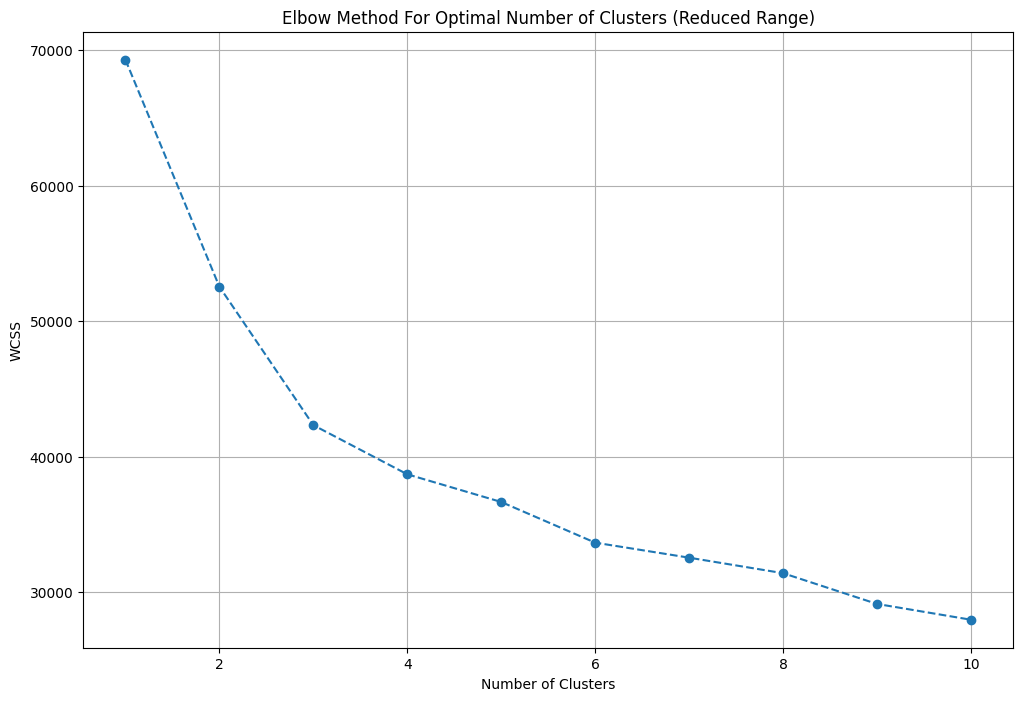

In [79]:
# doing this cause elbow curve shows k value where slope decreases slowly

plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [80]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [81]:
df = df.iloc[:,:-18]

In [83]:
df.sample(5)[['furnishDetails']]

,furnishDetails
3693,"['6 Fan', '10 Light', '4 AC', 'No Bed', 'No Ch..."
1088,"['1 Exhaust Fan', '7 Geyser', '12 AC', 'No Bed..."
1333,[]
859,NaN
1628,[]


In [84]:
df['furnishing_type'] = cluster_assignments

In [89]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
187,"['6 Wardrobe', '1 Water Purifier', '8 Fan', '1...",2
1011,[],0
953,"['2 Wardrobe', '2 Fan', '1 Exhaust Fan', '2 Li...",0
525,"['3 Wardrobe', '5 Fan', '3 Geyser', '10 Light'...",2
417,"['5 AC', '1 Chimney', '1 Modular Kitchen', 'No...",0


In [90]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,plot_area,study room,servant room,store room,pooja room,others,furnishing_type
0,flat,experion windchants,sector 112,3.65,11428.0,3194.0,Built Up area: 2800 (260.13 sq.m.),3.0,5.0,2,...,NaN,2800.0,NaN,NaN,0,1,0,0,0,0
1,flat,vatika gurgaon,sector 83,1.25,7812.0,1600.0,Super Built up area 2390(222.04 sq.m.)Carpet a...,4.0,4.0,3,...,2390.0,NaN,1600.0,NaN,0,1,0,0,0,0
2,flat,green court,sector 90,0.47,6811.0,690.0,Carpet area: 690 (64.1 sq.m.),2.0,2.0,1,...,NaN,NaN,690.0,NaN,0,0,0,0,0,0
3,flat,orchid petals,sector 49,1.90,10526.0,1805.0,Super Built up area 1805(167.69 sq.m.)Built Up...,3.0,3.0,3,...,1805.0,1600.0,1400.0,NaN,0,0,0,0,1,2
4,flat,bestech altura,sector 79,2.69,12500.0,2152.0,Super Built up area 2150(199.74 sq.m.),3.0,4.0,3+,...,2150.0,NaN,NaN,NaN,0,1,0,0,0,0


In [91]:
df[['society','features']].sample(5)

,society,features
213,smart world gems,"['Feng Shui / Vaastu Compliant', 'Security / F..."
2220,pioneer park,"['Centrally Air Conditioned', 'Water purifier'..."
1033,pyramid urban homes 2,"['Lift(s)', 'Park', 'Shopping Centre']"
2376,independent,"['Feng Shui / Vaastu Compliant', 'Private Gard..."
1623,shree vardhman victoria,"['Security / Fire Alarm', 'Feng Shui / Vaastu ..."


In [92]:
df['features'].isnull().sum()

np.int64(682)

In [98]:
app_df=pd.read_csv('apartments.csv')

In [99]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()



In [100]:
temp_df = df[df['features'].isnull()]

In [101]:
temp_df.shape


(682, 27)

In [102]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [103]:
df.loc[temp_df.index,'features'] = x.values

In [104]:
df['features'].isnull().sum()

np.int64(496)

In [105]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [106]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,...,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
2639,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3338,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
618,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1585,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [107]:
features_binary_df.shape

(3850, 131)

In [108]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

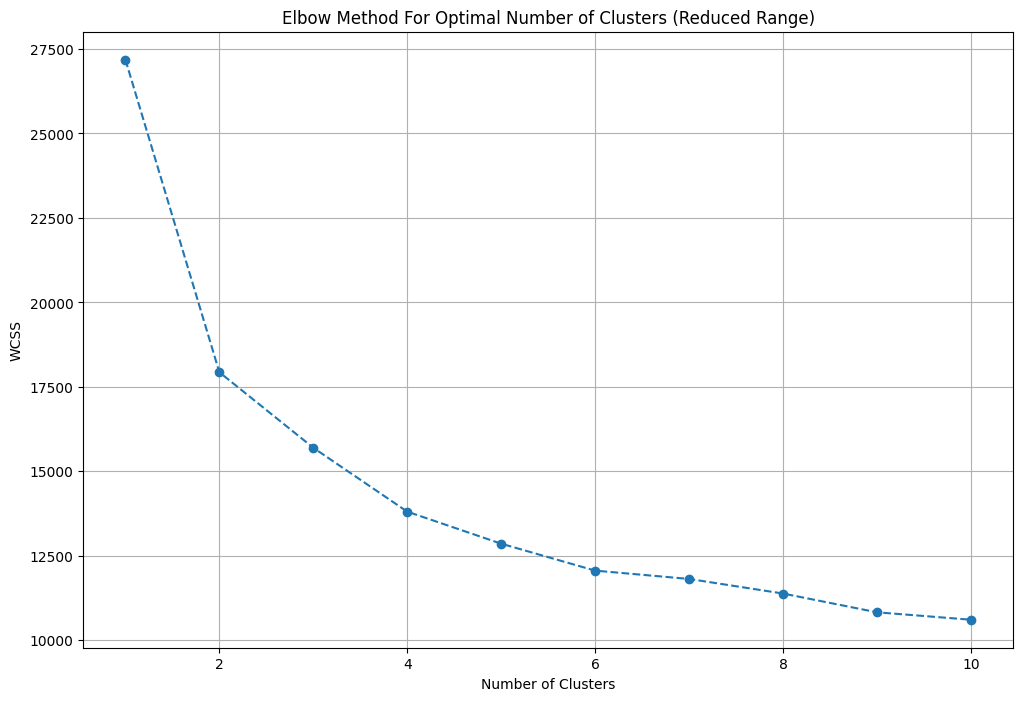

In [109]:
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [110]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [111]:
df['luxury_score'] = luxury_score

In [112]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,carpet_area,plot_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
541,flat,ireo the corridors,sector 67a,1.8,9370.0,1921.0,Super Built up area 1921(178.47 sq.m.)Carpet a...,3.0,3.0,2,...,1227.96,NaN,1,0,1,0,0,2,"[Water purifier, Security / Fire Alarm, Power ...",150
2224,house,independent,sector 7,2.0,11111.0,1800.0,Plot area 200(167.23 sq.m.),2.0,2.0,1,...,NaN,200.0,0,0,0,0,0,0,[],0
2449,house,independent,sector 105,0.5,50000.0,100.0,Built Up area: 100 (9.29 sq.m.),2.0,2.0,0,...,NaN,NaN,0,0,0,0,0,0,[],0
3800,house,independent,sector 24,3.2,59259.0,540.0,Plot area 60(50.17 sq.m.),14.0,14.0,3+,...,NaN,60.0,0,0,0,0,0,1,"[Water Storage, Park]",15
1900,house,mian wali,sector 12,1.7,9444.0,1800.0,Plot area 1800(167.23 sq.m.),1.0,1.0,1,...,NaN,1800.0,0,1,0,0,0,0,[Visitor Parking],7


In [113]:
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [114]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,plot_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3843,flat,ats kocoon,sector 109,2.22,10596.0,2095.0,Super Built up area 2095(194.63 sq.m.),3.0,3.0,3,...,NaN,NaN,NaN,0,1,0,0,1,0,79
1747,flat,signature global park,sohna road,0.65,7907.0,822.0,Carpet area: 822 (76.37 sq.m.),2.0,1.0,2,...,NaN,822.0,NaN,0,0,0,0,0,0,87
3100,flat,emaar imperial gardens,sector 102,1.92,9600.0,2000.0,Carpet area: 2000 (185.81 sq.m.),3.0,3.0,3,...,NaN,2000.0,NaN,1,1,1,1,0,0,95
3027,house,independent,sector 11,NaN,NaN,NaN,Plot area 2700(250.84 sq.m.),6.0,4.0,2,...,2700.0,NaN,2700.0,0,0,0,0,0,0,15
265,house,my home,sector 110,0.34,12592.0,270.0,Plot area 270(25.08 sq.m.),2.0,2.0,2,...,270.0,NaN,270.0,0,0,0,0,0,0,22


In [115]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)